In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os.path import join, exists
csv_dir = join(os.getcwd(), "data", "csv_files")

In [11]:
#chat_name = "ICECORE"
chat_name = "whoneedsfriendswhenyouhavejesus"
#chat_name = "Amigos"
csv_file = join(csv_dir, chat_name + "-reactions.csv")
df = pd.read_csv(csv_file)
total_ptcpts = len(df)

txt_file = join(csv_dir, chat_name + "-reactions.txt")
with open(txt_file, "r") as f:
    total_messages = int(f.read())


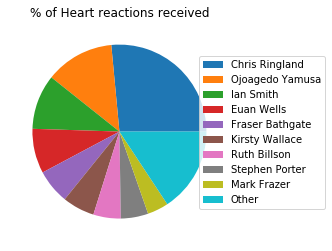

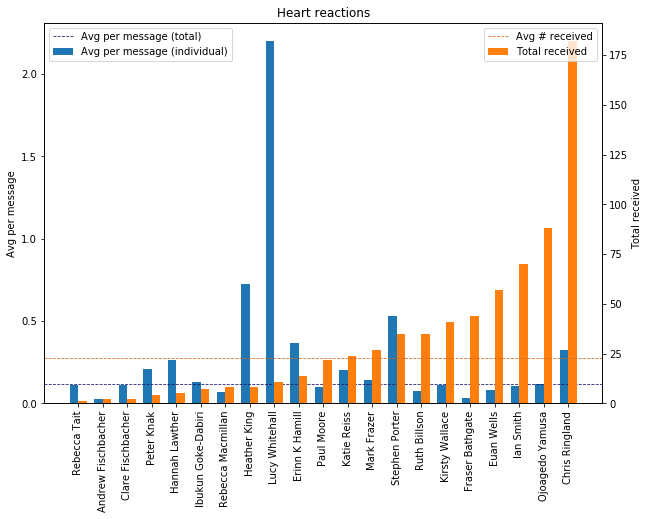

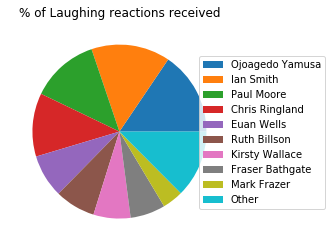

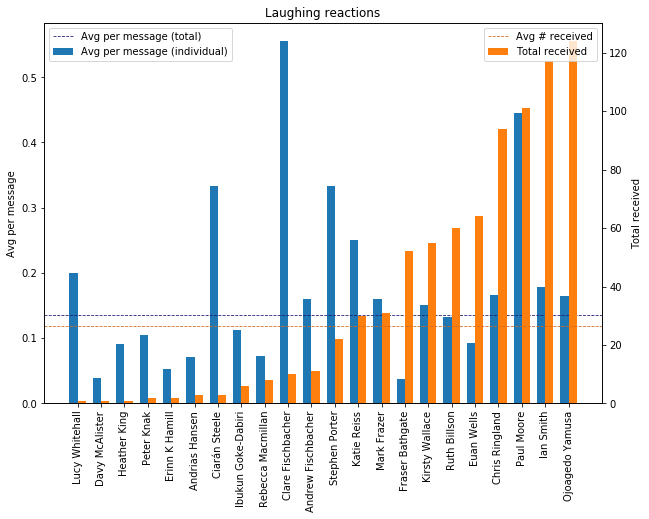

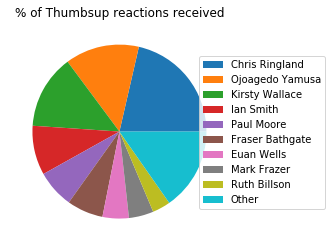

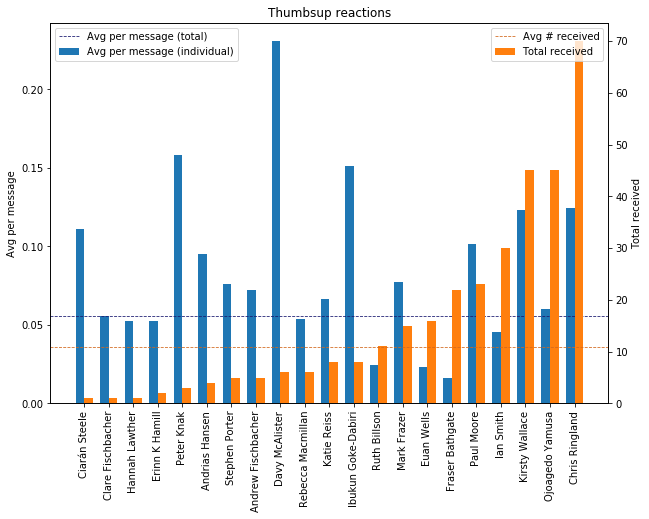

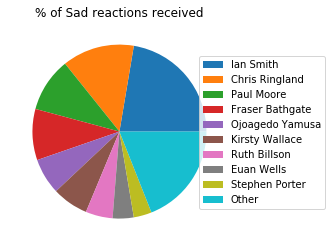

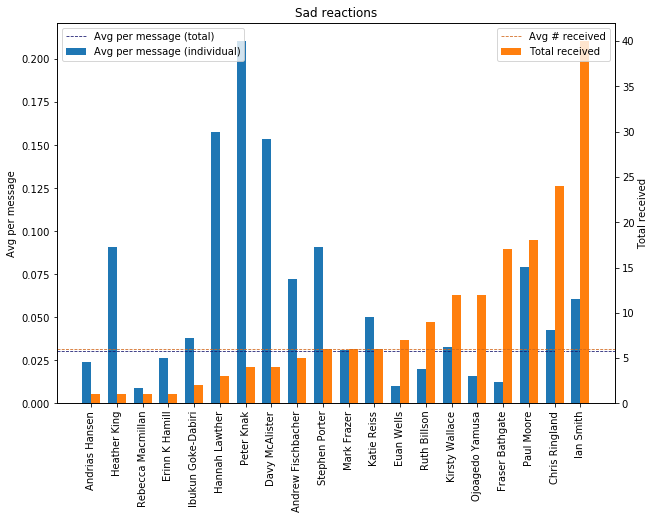

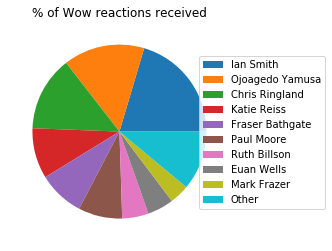

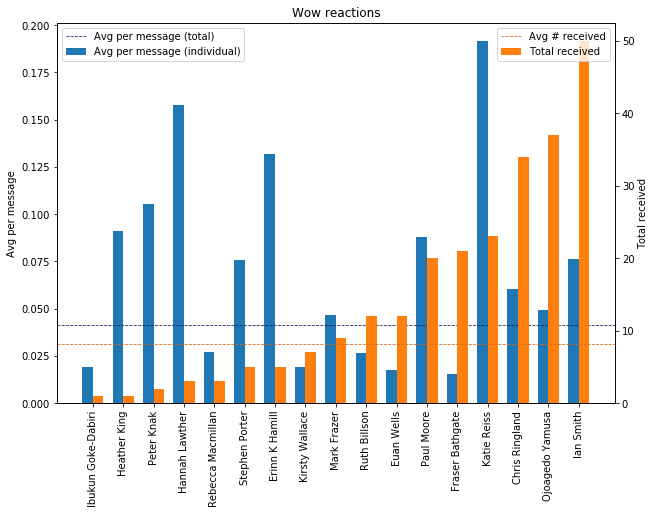

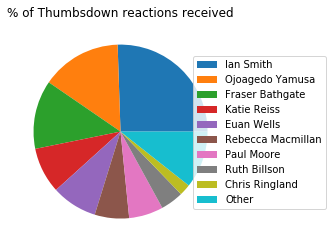

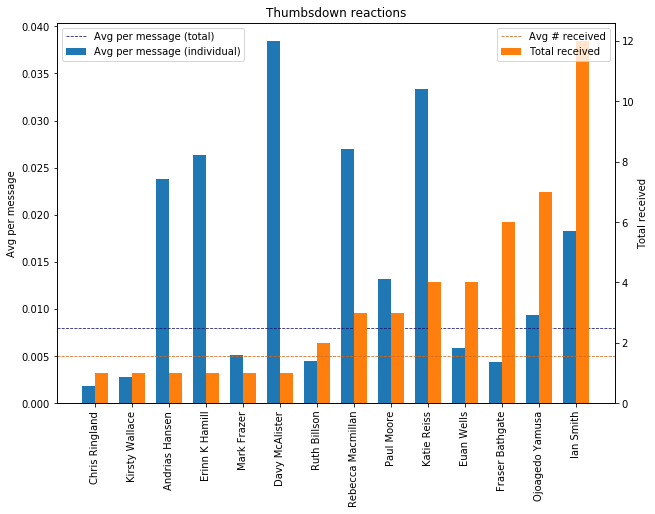

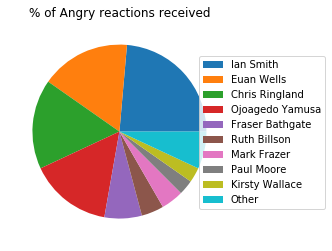

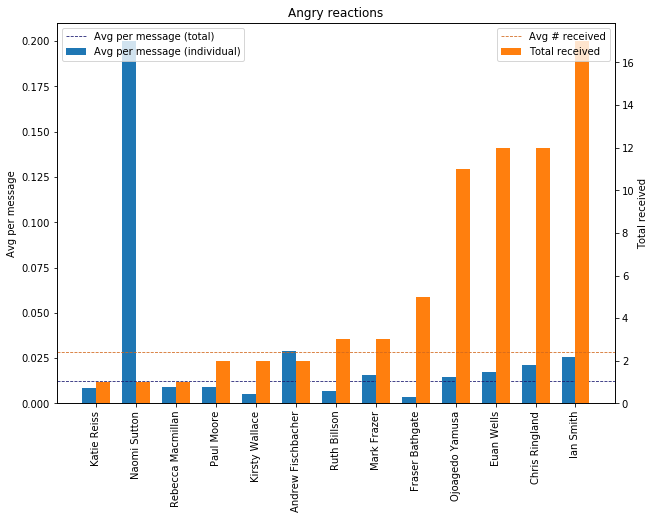

In [12]:
def plot_reaccs_pie(df, reaction):
    df = df.sort_values(by="percent_reacts", ascending=False)
    labels = df["name"]
    sizes = df["percent_reacts"]
    if len(sizes) > 10:
        other_size = sum(sizes[9:])
        labels = labels[0:9].tolist() + ["Other"]
        sizes = sizes[0:9].tolist() + [other_size]
    pie = plt.pie(sizes, startangle=0)
    plt.legend(pie[0],labels, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
    plt.title("% of {} reactions received".format(reaction.capitalize()))
    plt.show()
    

def plot_reaccs_bar(df, avg_num_reaccs, reaction, total_ptcpts):
    df = df.sort_values(by=reaction, ascending=True)
    labels = df["name"]
    msg_per = df["percent_messages"]
    msg_reaction_counts = df[reaction]
    fig, ax = plt.subplots(figsize=(10,7))
    x = np.arange(len(labels))
    width = 0.35
    rects1 = ax.bar(x - width/2, msg_per, width, 
                label="Avg per message (individual)")
    
    ax.axhline(avg_num_reaccs, c="midnightblue", linestyle="--", 
               lw=0.8, label="Avg per message (total)")
    
    ax2 = ax.twinx()
    rects2 = ax2.bar(x + width/2, msg_reaction_counts, width, 
                label="Total received", color="tab:orange")
    avg_react_count = msg_reaction_counts.sum()/total_ptcpts
    ax2.axhline(avg_react_count, c="chocolate", linestyle="--", 
                lw=0.8, label="Avg # received")
    
    ax.set_ylabel("Avg per message")
    ax2.set_ylabel("Total received")
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")
    ax.set_xticks(x)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    ax.set_xticklabels(labels)
    
    ax.set_title(reaction.capitalize() + " reactions")
    plt.show()
    

reactions = ["heart", "laughing", "thumbsup", "sad", "wow", "thumbsdown", "angry"]
for reaction in reactions:
    sub_df = df[["name", reaction, "total_messages"]]
    # Sort from lowest to highest
    sub_df = sub_df.sort_values(by=reaction, ascending=True)
    # Remove any rows with no reactions
    indexNames = sub_df[sub_df[reaction] == 0].index
    sub_df.drop(indexNames, inplace=True)
    total_reacts = sum(sub_df[[reaction]].sum(axis=1))
    
    # Add column with percentage of messages sent by person which received this reaction
    percent_messages = sub_df[reaction]/sub_df["total_messages"]
    sub_df["percent_messages"] = pd.Series(percent_messages, index=sub_df.index)
    
    # Add column with percentage of reactions out of the total reactions sent
    percent_reacts = sub_df[reaction]/total_reacts
    sub_df["percent_reacts"] = pd.Series(percent_reacts, index=sub_df.index)
    
    avg_num_reaccs = total_reacts / total_messages
    #print("Avg num {} reaccs per message: {}".format(reaction, avg_num_reaccs))
    plot_reaccs_pie(sub_df, reaction)
    plot_reaccs_bar(sub_df, avg_num_reaccs, reaction, total_ptcpts)